## This is a notebook for the Vector processing in Python session
You will be introduced to how to interact with vector objects in Python.

### Learning Objectives:
- to Create geospatial data 
- to Read / write spatial data from/to different file formats
- to Deal with different projections
- to Reclassify your data based on different criteria
- to Do queries and subsetting 
- to do Spatial overlays 


## Creating vector objects 

We assume that you are familiar with the two major types of data models that are used in GIS, which are vector and raster. Don't worry if you are NOT. Watch [this](https://gisgeography.com/spatial-data-types-vector-raster/) and/or read [this](https://www.youtube.com/watch?v=hbOGp51nYGI).

Basic geometric objects in vector are ``Points``, ``Lines`` and ``Polygons``, which consist of coordinate tuples where:

``Point`` -object represents a single point in space. ~ either 2D (x, y) or 3D (x, y, z).

``LineString`` -object represents a set of points linked to form a line. So, a list of at least 2 coordinate tuples.

``Polygon`` -object represents a filled area that consists of a list of > 3 coordinate tuples that forms the outerior ring and possibly a list of hole polygons.


### Useful functionalities of ``Shapely``:

- Create ``Points``, 
- Create ``Lines`` or ``Polygon`` from a Collection of ``Point`` -geometries,
- Calculate ``areas``, ``length``, ``bounds``, etc. of input geometries,
- Do geometric operations e.g., ``Union``, ``Difference``, ``Distance``, etc.,
- Conduct spatial queries between geometries such as ``Intersects``, ``Touches``, ``Crosses``, ``Within``, etc.

Here is a detailed [manual](https://shapely.readthedocs.io/en/latest/manual.html) to it, but you may read it right before [spatial analysis methods](https://shapely.readthedocs.io/en/latest/manual.html#spatial-analysis-methods).


In [ ]:
# Import necessary geometric objects from shapely module 
from shapely.geometry import Point, LineString, Polygon 

note that the coordinates are at Geographic Coordinate system. We recommend you learning about [coordinate systems](http://resources.esri.com/help/9.3/arcgisengine/dotnet/89b720a5-7339-44b0-8b58-0f5bf2843393.htm). 

Let's create three Point objects with coordinates by throwing in a pair of x,y 

In [ ]:
point1 = Point(2.2, 4.2) 
point2 = Point(7.2, -25.1) 
point3 = Point(9.26, -2.456) 


From the [Shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#coordinate-systems):
#### Shapely does not support coordinate system transformations. All operations on two or more features presume that the features exist in the same Cartesian plane.

In [ ]:
# this is a 3D point
point3D = Point(9.26, -2.456, 0.57) 

# What is the type of the point? 
point_type = type(point1)

print (point_type)

As you can see above, our point1 variable is now a ``Shapely`` ``Point`` -object

Let's now check the other ``Point`` objects 

In [ ]:
print(point1) 
print(point3D) 
print(type(point1))

### ``Point`` -object has some built-in attributes and some useful functionalities that can be accessed, e.g.,
    - to extract the coordinates of Points,
    - to calculate the Euclidian distance between them.
    
Let's get the coordinates of one of our points

In [ ]:
point_coords = point1.coords 

print ("The type is", type(point_coords))

We can get the x and y coordinates together or seperately in the next syntax:

In [ ]:
xy = point_coords.xy 
print("xy variable:\n", xy, "\n") 

We can also get `x` and `y` separately:

In [ ]:
x = point1.x 
y = point1.y 

print("x variable:\n", x, "\n") 
print("y variable:\n", y)

As you can see, the ``xy`` -variable contains a tuple where x and y coordinates are stored inside numpy arrays. Using the attributes point1.x and point1.y, it is possible to get the coordinates directly as plain decimal numbers.


Now, we are going to calculate the distance between the two points. Since Shapely only knows cartesian coordinates, we assume that we have already projected our coordinates (remember the [North Korea example](https://www.independent.com/2017/06/14/map-rap/)!).

The units of the distance measurement would then be the same as the units of the coordinate reference system, e.g. meters for UTM coordinates:

In [ ]:
point_dist = point1.distance(point2) 

print("Distance between the points is {0:.2f}".format(point_dist))

## Creating a ``LineString``

``LineString`` -object has many useful built-in functions e.g.,:  
- extracting the coordinates or the length of a ``LineString`` (line),
- calculate the ``centroid`` of the line, 
- create points along the line at specific distance, 
- simplify geometry. 


Let's Create a LineString from our Point objects :

In [ ]:
line1 = LineString([point1, point2, point3])
print("line1 variable: \n", line1, "\n") 

# you can print the type of line to see what kind of Shapely object it is
print("type of the line: \n", type(line1))

It is also possible to use coordinate tuples having the same outcome 

In [ ]:
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
print("line2 variable: \n", line2, "\n") 

## LineString attributes and functions
We can extract the coordinates of a LineString similarly as we did with ``Point``.

In [ ]:
# Get x and y coordinates of the line 
lxy = line1.xy 

print("The x, y coordinates of the line is", lxy)

As you can see, the coordinates are again stored as a numpy arrays where first array includes all x-coordinates and the second one all the y-coordinates, respectively.

We can extract x and y coordinates seperately:

In [ ]:
line_x = lxy[0] 

Extract y coordinates straight from the LineObject by referring to a array at index 1 

In [ ]:
line_y = line1.xy[1] 

print("line_x:\n", line_x, '\n') 
print('line_y:\n', line_y)

It is possible to retrieve specific attributes e.g., ``lenght`` of the line and center of the line (``centroid``) straight from the ``LineString`` object itself:


In [ ]:
l_length = line1.length 

l_centroid = line1.centroid 

# What type is the centroid? 
centroid_type = type(l_centroid) 

# Print the outputs 
print("Length of our line1: {0:.2f}".format(l_length)) 
print("Centroid of our line1: ", l_centroid) 
print("Type of the centroid:", centroid_type)

## Create a polygon

Creating a ``Polygon`` -object is similiar to ``Points`` and ``Lines`` creation, but you need at least three coordinate-tuples


In [ ]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]) 

We can also use our previously created Point objects (same outcome) 
--> notice that Polygon object requires x,y coordinates as input 

In [ ]:
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]]) 

# Geometry type can be accessed as a String 
poly_type = poly.geom_type 

# Using the Python's type function gives the type in a different format 
poly_type2 = type(poly) 

# Let's see how our Polygon looks like 
print('poly:', poly) 
print('poly2:', poly2) 
print("Geometry type as text:", poly_type) 
print("Geometry how Python shows it:", poly_type2)

Notice that Polygon representation has double parentheses around the coordinates like POLYGON ((<values in here>)). This is because a Polygon can also have holes inside of it.
    
If you want to know more about it, here is the help of ``Polygon``. Notice the ``exterior`` and ``interior`` attributes. 
A Polygon can be constructed using exterior and interior coordinates i.e., interior coordinates == hole inside the Polygon:


In [ ]:
help(Polygon)

### Let’s see how we can create a Polygon with a hole inside.

Let's create a rectangle make a whole in it. First we define our exterior: 

In [ ]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)] 

*Note that these are still not degrees, even though the numbers migth suggest that!*

Let's create a single big hole where we leave ten units at the boundaries. 

Notice: there could be multiple holes, therefore we need to provide a list of holes: 

In [ ]:
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]] 

# World without a hole 
world = Polygon(shell=world_exterior) 

# Now we can construct our Polygon with the hole inside 
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

#Let’s see what we have now
print('world:', world) 
print('world_has_a_hole:', world_has_a_hole) 
print('type:', type(world_has_a_hole))

#### Let's see a few of the available attributes and how to access them:
Note that the units are in terms of degrees (Each degree of latitude is approximately 111 kilometers apart. The range varies (due to the earth's slightly ellipsoid shape) from 110.567 km at the equator to 111.699 km at the poles. 

In [ ]:
world_centroid = world.centroid 
world_area = world.area 
world_bbox = world.bounds 

world_ext = world.exterior 
world_ext_length = world_ext.length 

print("Poly centroid: ", world_centroid) 
print("Poly Area: ", world_area) 
print("Poly Bounding Box: ", world_bbox) 
print("Poly Exterior: ", world_ext) 
print("Poly Exterior Length: ", world_ext_length)

You can make a quick plot of the objects you created just by typing its name...don't worry, you will learn how to make nice maps!

In [ ]:
world

In [ ]:
world_has_a_hole

# Part 2

# ![GeoPandas](https://geopandas.org/en/stable/_static/geopandas_logo_web.svg)

[Geopandas](https://geopandas.org) is a Python module that is built on top of [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) extending its functionalities, i.e., all functionalities of pandas works also in geopandas. 

``Geopandas`` has many good built-in spatial processing/analysis features such as overlay analysis, geocoding, spatial aggregation methods.``GeoPandas`` makes working with geospatial data in python easier.

Geometric operations are performed by ``shapely``. 

Geopandas also depends on [fiona](https://fiona.readthedocs.io/en/latest/manual.html#introduction) for file access, and [descartes](https://pypi.org/project/descartes/) + [matplotlib](https://matplotlib.org) for plotting.


You will learn 
- how to read and write spatial data, 
- how to deal with projections in Python using Geopandas 
- and some useful data management functionalities.

#### Let’s Download Land Use data for Copenhagen 2012

This bit will download a zip file with data for Copenhagen and unzip it into a folder called `Data2`.

#### What is *land use* data? 
Land Use data refers to data describing what each piece of land is being used for i.e., the usage of a land parcel in the form of pixels of polygons.

#### What is the *Urban Atlas*? 
check [this](https://land.copernicus.eu/local/urban-atlas/urban-atlas-2012?tab=metadata) out!

#### What is a *shapefile*?
 Check [this](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm) out!


In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

#the data is hosted on the European Environment Agency's website, 
# so in case it is missing, you can find it in other websites as well
zipurl = 'https://www.eea.europa.eu/data-and-maps/data/urban-atlas/denmark/dk001l_kobenhavn.zip/at_download/file'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('Data2')

In [ ]:
# make sure you know where the data is stored after downloading and unzipping
import os
os.getcwd()

Let's open our fresh new shapefile using [geopandas](https://geopandas.org):
Geopandas can read vector data formats e.g., Shapefile, GeoJSON, KML. 

In [ ]:
# Import necessary modules 
import geopandas as gpd 
import os

#Set filepath 
fp = "Data2/dk001l_kobenhavn/dk001l_kobenhavn.shp" 

# Read file using gpd.read_file() 
data = gpd.read_file(fp)

# you can see what kind of object we have now, which is a GeoPandas' GeoDataFrame
print ("The type of data is", type(data))

# let's preview our data but only the first 20 rows
print(data.head(10)) 


what you see above is land use data and the associated attributes such as `Cities`, `LUZ_OR_CIT`, `city code`, `land use ITEM`, `Production date`, `shape length`, `shape area`, and `Geometry`.

## Let's plot our data
Creating a simple map from a GeoDataFrame ==> use ``.plot()`` -function that creates a map based on data geometries. 

In [ ]:
# a quicklook of the geodataframe
%matplotlib inline 

data.plot()

if you'd like to make a bigger plot with more element, try ``help(data.plot)``

In [ ]:
help(data.plot)

In [ ]:
%matplotlib inline

# a bit more decorated
data.plot(figsize=(60, 25), column='ITEM', legend=True, categorical=True)

## How to write it to a new shapefile

Let’s export first 50 rows of the data into a new Shapefile by first selecting the data and then with ``gpd.to_file()`` -function:

In [ ]:
# Set the output path for the data 
outfp = "Data2/dk001l_kobenhavn/dk001l_kobenhavn_subset.shp" 

# Select first 50 rows 
selection = data[0:50] 

# Write those rows into a new Shapefile (the default output file format is Shapefile) 
selection.to_file(outfp)

## 🏋 Exercise

Plot the subset data! Add your code in the cell below. Feel free to become fancy and add a lot more elements to the plot

Let’s print the first 5 rows of the data. You can specify a column like ‘ITEM’ and only show that attributes of that column:


In [ ]:
print(data.head())

In [ ]:
print(data['ITEM'].head())

Since the spatial data is stored as Shapely objects, it is possible to use all of the functionalities of ``Shapely`` module.
Let’s prove that this is really the case by iterating over a sample of the data, and printing the area of first ten polygons.
We can iterate over the rows by using the ``iterrows()`` -function.


In [ ]:
# Make a selection that contains only the first five rows 
selection = data[0:10] 
# Iterate over rows and print the area of a Polygon 
for index, row in selection.iterrows(): 
    # Get the area of the polygon 
    poly_area = row['geometry'].area 
    # Print information for the user 
    print("Polygon area in m2 at index {index} is: {area:.3f}".format(index=index, area=poly_area))


Let’s now create a new column into our GeoDataFrame where we calculate/store the areas of polygons into that column. No need to iterate like before.


In [ ]:
# Create a new column called 'area' and assign the area of the Polygons into it 
data['area'] = data.area 
# Print first 5 rows of the area column 
print(data['area'].head(5))


## Let’s get the min, max and mean of areas.


In [ ]:
# Maximum area 
max_area = data['area'].max() 
# Minimum area 
min_area = data['area'].min() 
# Mean area 
mean_area = data['area'].mean() 

print("Max area: {max} m2 \nMin area: {min} m2 \nMean area: {mean} m2".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))


# Creating GeoDataFrame from freshly baked geometries

Since geopandas takes advantage of Shapely geometric objects, it is possible to create a Shapefile from scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile. Next we will see how to create a Shapefile from scratch.


Let’s create an empty GeoDataFrame.

In [ ]:
# Create an empty geopandas GeoDataFrame 
newdata = gpd.GeoDataFrame() 

# Let's see what we have at the moment 
print(newdata)


Let’s create a new column called geometry that will contain our Shapely objects:

In [ ]:
# Create a new column called 'geometry' to the GeoDataFrame 
newdata['geometry'] = None 

# Let's again see what's inside 
print(newdata)


Now we have a geometry column in our GeoDataFrame but we don’t have any data stored yet.
Let’s create a Shapely Polygon repsenting our current location (AAU) that we can later insert to our GeoDataFrame:


In [ ]:
# Coordinates of the AAU campus in Decimal Degrees (but still on a flat Earth!)
coordinates = [(12.543269, 55.650061), (12.543806, 55.650511), (12.542054, 55.651096), (12.541585, 55.650672)] 

# Create a Shapely polygon from the coordinate-tuple list 
poly = Polygon(coordinates) 

# Let's see what we have 
print(poly)


Okay, now we have an appropriate ``Polygon`` -object.
Let’s insert the polygon into our `geometry` column of our GeoDataFrame at position 0:


In [ ]:
# Insert the polygon into 'geometry' -column at index 0 
newdata.loc[0, 'geometry'] = poly 

# Let's see what we have now 
print(newdata)

Now, we have a GeoDataFrame with a Polygon that we could already export to a Shapefile. However, typically you might want to include some useful information with your geometry.
Hence, let’s add another column to our GeoDataFrame called location with text AAU that describes the location of the feature.

In [ ]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = "Aalborg University"

# Let's check the data 
print(newdata)


Before exporting, it is necessary to specify the coordinate reference system (projection) for the GeoDataFrame. 
GeoDataFrame has an attribute called .crs that shows the coordinate system of the data.

### 🔥 If you have never worked with GIS data before, make sure to read this [introduction to coordinate reference systems](https://docs.qgis.org/3.10/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)!


In [ ]:
print(newdata.crs) 

The CRS is not specified here, which will be a problem once we want to combine the data with other data – we simply don't know which area on the Earth it refers to, so let’s add a `crs` for our GeoDataFrame.`fiona` has a function called ``from_epsg()`` for passing the coordinate reference system information for the GeoDataFrame. Use WGS84 (epsg code: 4326):

PS. The [EPSG database](https://epsg.io) assigns standardised codes to commonly used CRSs.

In [ ]:
# Import specific function 'from_epsg' from fiona module 
from fiona.crs import from_epsg 

# Set the GeoDataFrame's coordinate system to WGS84: epsg code 4326 
newdata.crs = from_epsg(4326) 

# Let's see how the crs definition looks like 
print(newdata.crs)


Now, we can export the GeoDataFrame using ``.to_file()`` -function.
We only need to provide the output path for the Shapefile. 


In [ ]:
# Determine the output path for the Shapefile 
outfp = "AAU.shp" 

# Write the data into that Shapefile 
newdata.to_file(outfp)


# Practical example: Saving multiple Shapefiles

A very useful function that can be used in Pandas/Geopandas is ``.groupby()``, which allows you to group data based on values on selected column(s).
Next we will take a practical example by automating the file export task. 

We will group individual land use types in our ”dk001l_kobenhavn.shp” and export those into separate Shapefiles.
Let’s start from scratch and read the Shapefile into GeoDataFrame:



In [ ]:
# Read land use data 
fp = "Data2/dk001l_kobenhavn/dk001l_kobenhavn.shp" 
data = gpd.read_file(fp) 

# Print columns 
print(data.columns)

The `TYPE` column in the data contains information about different land use types. With ``.unique()`` -function we can quickly see all different names in that column:


In [ ]:
# Print all unique land use types in ‘ITEM' column 
print(data['ITEM'].unique())

Now we can use that information to group our data and save all individual land use types as separate Shapefiles:


In [ ]:
# Group the data by column ‘ITEM’ 
grouped = data.groupby('CODE') 

# Let's see what we have 
grouped


As we can see,``groupby`` -function gives us an object called `DataFrameGroupBy`, which is similar to list of keys and values (like in a dictionary) that we can iterate over.  

Let’s iterate over the groups and see what our variables key and values contain

In [ ]:
# Iterate over the group object 
for key, values in grouped: 
    individual_LU = values 
    
# Let's see what is the LAST item and key that we iterated 
print('number of records:', key)
print(individual_LU)


Finally, let’s  export all individual LU types into separate Shapefiles:


In [ ]:
# Determine output directory 
out_directory = "dk001l_kobenhavn" 

# Create a new folder called 'Results’ 
result_folder = os.path.join(out_directory, 'Results') 

# Check if the folder exists already 
if not os.path.exists(result_folder): 
# If it does not exist, create one 
    os.makedirs(result_folder) 
# Iterate over the groups 

for key, values in grouped: 
# Format the filename (replace spaces with underscores using 'replace()'-function) 
    output_name = "%s.shp" % key.replace(" ", "_") 
# Print some information for the user 
    print("Processing: %s" % key) 
# Create an output path 
    outpath = os.path.join(result_folder, output_name) 
# Export the data 
    values.to_file(outpath)


# Map projections

Shapefiles contain information about the coordinate reference system that is stored in `.prj` -file (if the data has been appropriately produced). When reading the data into GeoDataFrame with Geopandas this information is automatically stored into `.crs` of the GeoDataFrame.
Let’s read Europe_borders.shp file and checking the crs:

In [ ]:
#let's download a file containting European borders
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

#the data is from EEA 
zipurl ='https://github.com/jimjoker/Geospatial-Analysis-Notebooks/raw/master/Data2.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('Data')


In [ ]:
import geopandas as gpd
# Read the file 
fp = "Data/Data2/Europe_borders.shp" 


data = gpd.read_file(fp) 
data.plot()

# Check the details of the coordinate reference system. It's "WGS84", EPSG:4326
print("projection is:", data.crs)

data['geometry'].head()
#the crs is a Python dictionary with a key init that has a value epsg:4326. This is a very typical way how CRS is stored in GeoDataFrames. 


Let’s continue by checking the values in our ``geometry`` -column to verify that the CRS of our GeoDataFrame is correct: (note that the units are not decimal degress, it is metric)

In [ ]:
data['geometry'].head() 

WGS84 projection is not really a good one for representing European borders, so let’s convert those geometries  to Lambert Azimuthal Equal Area projection (EPSG: 3035), which is the recommended projection by European Comission, to see the diffrences of the two projections.

Let’s re-project our data into EPSG 3035 using ``epsg`` -parameter:


In [ ]:
# Let's make a copy of our data 
orig = data.copy() 

# Reproject the data 
data = data.to_crs("EPSG:3035") 


# Check the new geometry values 
print(data['geometry'].head())

Let’s compare the datasets by making maps out of them.


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 

# Make subplots that are next to each other 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) 

# Plot the data in ETRS-LAEA projection  
orig.plot(ax=ax1, facecolor='gray')

# Add title 
ax1.set_title("WGS84")

# Plot the one with WGS84 CRS 
data.plot(ax=ax2, facecolor='black')

# Add title 
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Remove empty white space around the plot 
plt.tight_layout()


You can visually comapre the two maps and see how distances and areas get distorted across the entire area. 

Let's export the re-projected data!

In [ ]:
# Ouput filepath 
outfp = "Europe_borders_epsg3035.shp" 
# Save to disk 
data.to_file(outfp)


# Calculating distances

The aim is to find the Euclidean distances from the centroids of all European countries to Copenhagen using a metric projection (`Azimuthal Equidistan` -projection) in meters. 
Let’s first create a GeoDataFrame that contains a single Point representing the location of CPH:


In [ ]:
# Import necessary modules 
from shapely.geometry import Point 
import pycrs 
# Create the point representing CPH (in WGS84) 
cph_lon = 12.5683 
cph_lat = 55.6761 
# Create GeoDataFrame 
copenhagen = gpd.GeoDataFrame([[Point(cph_lon, cph_lat)]], geometry='geometry', crs='epsg:4326', columns=['geometry']) 
# Print 
print(copenhagen)


In [ ]:
# Import pyproj 
import pyproj 

# Define the projection using the coordinates of our CPH point (cph_lat, cph_lon) as the center point 
# The .srs here returns the Proj4-string presentation of the projection 
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=cph_lat, lon_0=cph_lon).srs

# Reproject to aeqd projection using Proj4-string 
copenhagen = copenhagen.to_crs(crs=aeqd) 

# Print the data 
print(copenhagen) 
# Print the crs 
print("\nCRS:\n", copenhagen.crs)


Next we want to transform the Europe_borders.shp data into the desired projection.

Let’s create a new copy of our GeoDataFrame into a variable called europe_borders_aeqd:


In [ ]:
# Create a copy 
europe_borders_aeqd = data.copy() 


Let’s now reproject our Europe borders data into the Azimuthal Equidistant projection that was centered into Copenhagen:


In [ ]:
# Reproject to aeqd projection that we defined earlier 
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd) 

# Print 
print(europe_borders_aeqd.head(2))


Let’s plot the Europe borders and the location of CPH to get a better understanding how our projection has worked out:


In [ ]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(10,10)) 

# Plot the country borders 
europe_borders_aeqd.plot(ax=ax) 

# Plot the Copenhagen point on top of the borders using the same axis 
copenhagen.plot(ax=ax, color='red', markersize=15)


Our goal is to calculate the distance from all countries to Copenhagen. So, we need to calculate the centroids for all the Polygons representing the boundaries of European countries.
This can be done easily in Geopandas by using the ``centroid`` attribute:


In [ ]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid 
print(europe_borders_aeqd.head(5))


First, we will create a dedicated function for calculating the distances called ``calculate_distance()``:


In [ ]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.
    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.
    Returns
    -------
    Distance in kilometers that will be stored in 'target_col'.
    """
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row


Before using our function and calculating the distances between Copenhagen and centroids, we need to get the Shapely point geometry from the re-projected Copenhagen center point that we can pass to our function (into the ``dest_geom`` -parameter. We can use the ``loc`` -functionality to retrieve the value from specific index and column:


In [ ]:
# Retrieve the geometry from Copenhagen GeoDataFrame 
copenhagen_geom = copenhagen.loc[0, 'geometry'] 

print(copenhagen_geom)


When iterating over a GeoDataFrame, apply function is used like this
GeoDataFrame.apply(name_of_your_function, param1, param2, param3,  axis=1)

In [ ]:
# Calculate the distances using our custom function called 'calculate_distance’ 
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, 
    dest_geom=copenhagen_geom, src_col='centroid', target_col='dist_to_cph', axis=1) 

print(europe_borders_aeqd.head(10))


In [ ]:
data.head(3)

Let’s check what is the longest and mean distance to Copenhagen from the centroids of other European countries:


In [ ]:
# Calculate the maximum and average distance 
max_dist = europe_borders_aeqd['dist_to_cph'].max() 
mean_dist = europe_borders_aeqd['dist_to_cph'].mean() 

print("Maximum distance to Copenhagen is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))


# Geometric operations: Overlay analysis

The aim is to make an overlay analysis where we create a new layer based on geometries from a dataset that intersect with geometries of another layer. 
Here, we are going to clip land use features from `dk001l_kobenhavn.shp` within a box `CPH_Box.shp`

Here is a set of functions for overlay analysis.
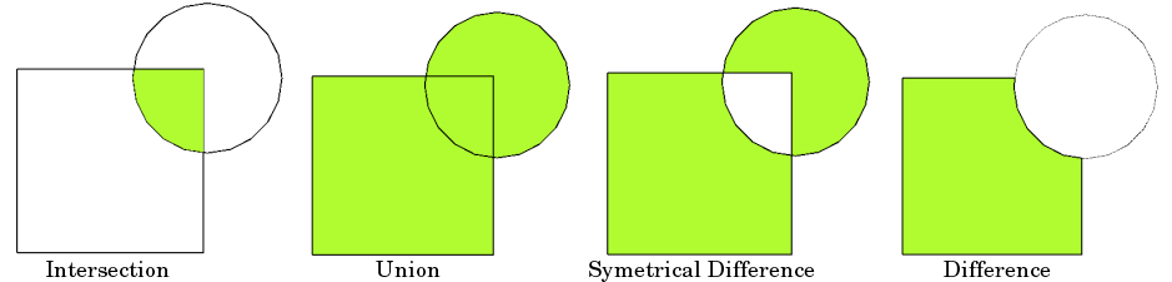




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# Let's enable speedups to make queries faster
shapely.speedups.enable()

# File paths, make sure you know where you data is 
border_fp = "Data/Data2/CPH_Box.shp"
grid_fp = "Data2/dk001l_kobenhavn/dk001l_kobenhavn.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

# Plot the layers
ax = grid.plot(facecolor='grey')
hel.plot(ax=ax, facecolor='None', edgecolor='red')

Here the red area is the borders that we want to use for conducting the overlay analysis and select the geometries from the Polygon grid.
Always, when conducting GIS operations involving multiple layers, it is required to check that the CRS of the layers match:



In [ ]:
# Ensure that the CRS matches, if not raise an AssertionError 
assert hel.crs == grid.crs, "CRS differs between layers!"

let's reproject the ``hel`` geodataframe into the same projection as ``grid``is in


In [ ]:
hel_new = hel.to_crs(grid.crs)

Let’s do an overlay analysis and create a new layer from polygons of the grid that intersect with our CPH layer. 

We can use a function called ``overlay()`` to conduct the overlay analysis that takes inputs like
- the GeoDataFrame where the selection is taken, 
- the GeoDataFrame used for making the selection, and 
- parameter how that can be used to control how the overlay analysis is conducted (possible values are `intersection`, `union`, `symmetric_difference`, `difference`, and `identity`).

In [ ]:
intersection = gpd.overlay(grid, hel_new, how='intersection')

Let’s plot it!


In [ ]:
intersection.plot(color="b") 

Let's check whether the attributes are also there!

In [ ]:
print(intersection.head()) 

==>

Let’s save our result grid as a GeoJSON file that is commonly used file format nowadays for storing spatial data.


In [ ]:
# Output filepath 
outfp = "CPH_LU_Box.geojson" 

# Use ESRI Shapefile driver 
intersection.to_file(outfp, driver='GeoJSON')

You can see what data formats `Fiona` supports  

In [ ]:
import fiona
fiona.supported_drivers

### Notice:
if your dataset contains multipart objects, you will have to convert them into single object features.

So, in that case you will have to run the following function on your dataset.


In [ ]:
#import fiona
#from shapely import geometry
#upcast_dispatch = {geometry.Point: geometry.MultiPoint, 
#                  geometry.LineString: geometry.MultiLineString, 
#                  geometry.Polygon: geometry.MultiPolygon}

#def maybe_cast_to_multigeometry(geom):
#    caster = upcast_dispatch.get(type(geom), lambda x: x[0])
#    return caster([geom])
#intersection2=intersection.geometry.apply(maybe_cast_to_multigeometry)

#### What's next? Aggregation

Aggregation means merging Geometries together by some common identifier. Suppose we are interested in studying continents, but we only have country-level data like the country dataset. By aggregation we would convert this into a continent-level dataset.

Here, we will aggregate our land use data by type (column `ITEM`), i.e. the grid cells that have the same land type will be dissolved.

For doing the aggregation we will use a function called ``dissolve()``.

In [ ]:
# Conduct the aggregation 
dissolved = intersection.dissolve(by="ITEM") 
# What did we get 
print(dissolved.head())

Let’s compare the number of cells in the layers before and after the aggregation:


In [ ]:
print('Rows in original intersection GeoDataFrame:', len(intersection))
print('Rows in dissolved layer:', len(dissolved))


What happend? ===>

In [ ]:
print(dissolved.columns) 

As we can see, the column that we used for conducting the aggregation (ITEM) can not be found from the columns list anymore. What happened to it?

It is now used as index in our dissolved GeoDataFrame.


In [ ]:
print(dissolved.index) 

Now, we can f.x. select only such geometries from the layer that are ”Green urban areas” :


In [ ]:
# Select only geometries that are Green urban areas
sel_green = dissolved.iloc[15] 
# See the data type 
print(type(sel_green)) 
# See the data 
print(sel_green.head())


In [ ]:
# Select only geometries that are Green urban areas
sel_green = dissolved.loc['Green urban areas'] 
# See the data type 
print(type(sel_green)) 
# See the data 
print(sel_green.head())



Now, we have a ``Pandas`` Series object containing basically one row from our original aggregated GeoDataFrame. Let’s convert the Series into GeoDataFrame and plot it to see where those green areas are located:


In [ ]:
# Create a GeoDataFrame 
geo = gpd.GeoDataFrame([sel_green.values], crs=dissolved.crs, columns=dissolved.columns) 

# Plot the grid cells that are green
ax = dissolved.plot(facecolor='grey') 
geo.plot(ax=ax, facecolor='green')


## 🏋 Exercise

Select `Industrial, commercial, public, military and private units` geometries and plot them. Add your code below!